In [5]:
from IPython .core. interactiveshell import InteractiveShell  # todas las salidas
InteractiveShell . ast_node_interactivity = "all"

Es un algotimo no supervisado, especial para clasificar. 

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import 
from matplotlib import style
import warnings
from collections import Counter
from math import sqrt

In [67]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
df = pd.read_csv(mainpath+'cancer/breast-cancer-wisconsin.data.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [68]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [69]:
df.columns = ['name', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'class']
df.head()
df = df.drop(['name'], 1)

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [70]:
df.head()
df.replace('?', -99999, inplace=True)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [71]:
Y = df['class']
X = df[ ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']]


### Clasificacion de los k vecinos

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors 

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [74]:
clf= neighbors.KNeighborsClassifier()

In [75]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
accuracy=clf.score(X_test, Y_test)
accuracy

0.9642857142857143

### Clasificacion sin limpieza 

In [61]:
df = pd.read_csv(mainpath+'cancer/breast-cancer-wisconsin.data.txt', header=None)
df.replace('?', -99999, inplace=True)
df.columns = ['name', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'class']
Y = df['class']
X = df[ ['name','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
clf= neighbors.KNeighborsClassifier()
clf.fit(X_train, Y_train)
accuracy=clf.score(X_test, Y_test)
accuracy

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.5714285714285714

### Clasificar nuevos datos

In [79]:
sample_measure = np.array([4,2,1,1,1,2,3,2,1]).reshape(1,-1)

In [80]:
predict = clf.predict(sample_measure)
predict

array([2], dtype=int64)

In [90]:
sample_measure2=np.array([[4,2,4,4,4,2,3,2,1], [4,2,4,4,4,4,4,4,4]]).reshape(2,-1)

In [91]:
predict2 = clf.predict(sample_measure2)
predict2


array([2, 4], dtype=int64)

### Creando a KNN desde '0'

In [95]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
    
}
new_point =[5,7]

[[<matplotlib.collections.PathCollection at 0x2279973ae48>,

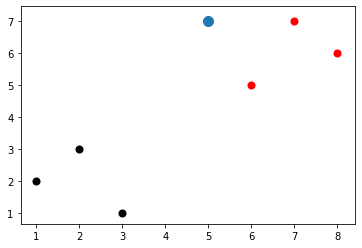

In [97]:
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

In [101]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data)>=k:
        warnings.warn('k es un valor menor que el numero total de elementos a votar!')
        
    distances = []
    for group in data:
        for feature in data[group]:
            #d=sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum(np.array(feature)- np.array(predict)**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([d,group])
            
    print(distances) 
    votes = [i[1] for i in sorted(distances)[:k]]# sorted ordena por la primera columna.
    print(votes)
    
    vote_result= Counter(votes).most_common(1) #[('r',2),('k',1)]
    print(vote_result)
    return vote_result[0][0]

In [102]:
k_nearest_neighbors(dataset, new_point)

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'